In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read the data as a monthly Time Series from the '.csv' file.

In [2]:
df = pd.read_csv('SoftDrink.csv',parse_dates=True,index_col='YearMonth')
df.head()
## Here we will create a separate date range and then add it to the data instead of parsing the dates

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


In [3]:
df.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


In [4]:
df.tail(100)

,SoftDrinkProduction
YearMonth,
1987-04-01,2912
1987-05-01,2708
1987-06-01,2798
1987-07-01,3254
1987-08-01,2895
...,...
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [6]:
df.tail()

,SoftDrinkProduction
YearMonth,
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937
1995-06-01,4365
1995-07-01,4290


In [7]:
df.isnull().sum()

SoftDrinkProduction    0
dtype: int64

## Plot the Time Series to understand the behaviour of the data

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

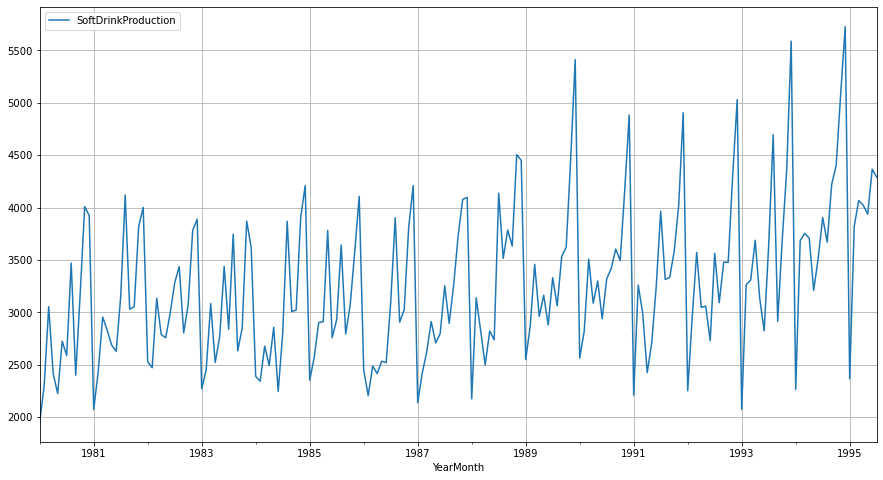

In [9]:
df.plot(grid=True);

## Check the basic measures of descriptive statistics of the Time Series

In [10]:
round(df.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
SoftDrinkProduction,187.0,3262.61,728.357,1954.0,2748.0,3134.0,3741.0,5725.0


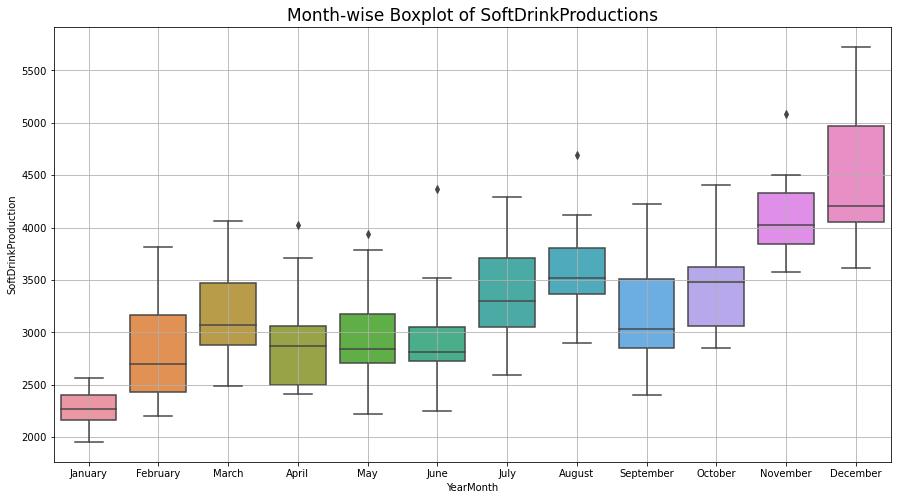

In [11]:
sns.boxplot(x = df.index.month_name(), y = df['SoftDrinkProduction']);
plt.grid();
plt.title('Month-wise Boxplot of SoftDrinkProductions', fontsize=17);
plt.savefig('SoftDrink_monthwise_box.jpg', bbox_inches='tight');

# Decompose the Time Series and plot the different components.

In [12]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

# Additive Decomposition of Soft Drink

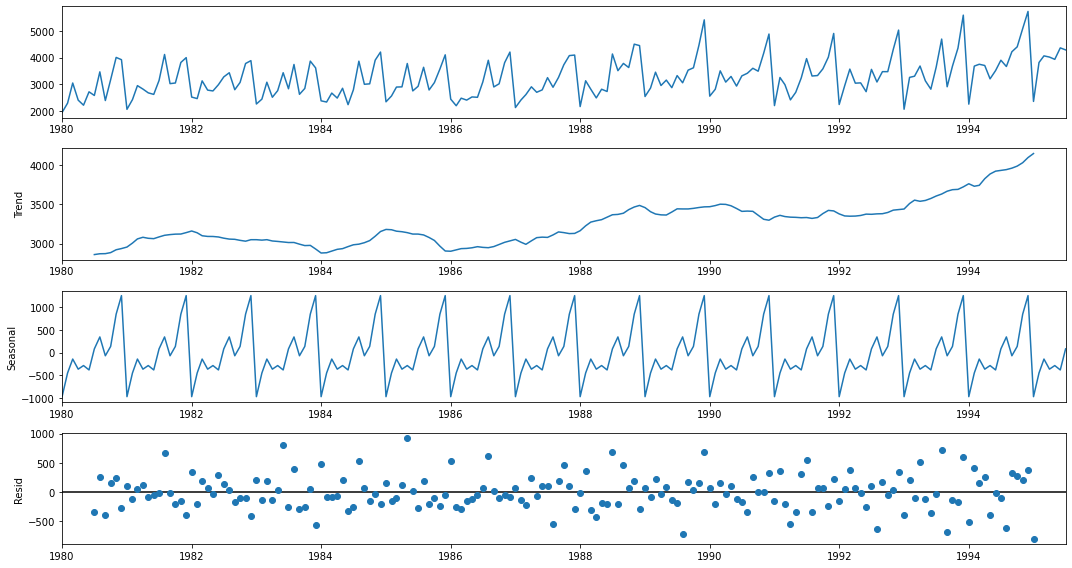

In [13]:
decompositions = seasonal_decompose(df,model='additive')
decompositions.plot();
plt.savefig('decomposes.jpg', bbox_inches='tight');

In [14]:
trend = decompositions.trend
seasonality = decompositions.seasonal
residual = decompositions.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('SoftDrinkProduction_trend.csv')
seasonality.head(12).to_csv('SoftDrinkProduction_season.csv')
residual.head(12).to_csv('SoftDrinkProduction_resid.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -974.619692
1980-02-01    -451.246677
1980-03-01    -143.118700
1980-04-01    -366.181200
1980-05-01    -286.815129
1980-06-01    -383.594891
1980-07-01      82.191419
1980-08-01     346.363641
1980-09-01     -69.997470
1980-10-01     136.721974
1980-11-01     850.369196
1980-12-01    1259.927530
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01   -352.024752
1980-08-01    254.386359
1980-09-01   -400.669196
1980-10-01    159.444692


In [15]:
cvsa = residual.std()/residual.mean()
cvsa

-90.02925859401661

# Multiplicative Decomposition of Soft-Drink

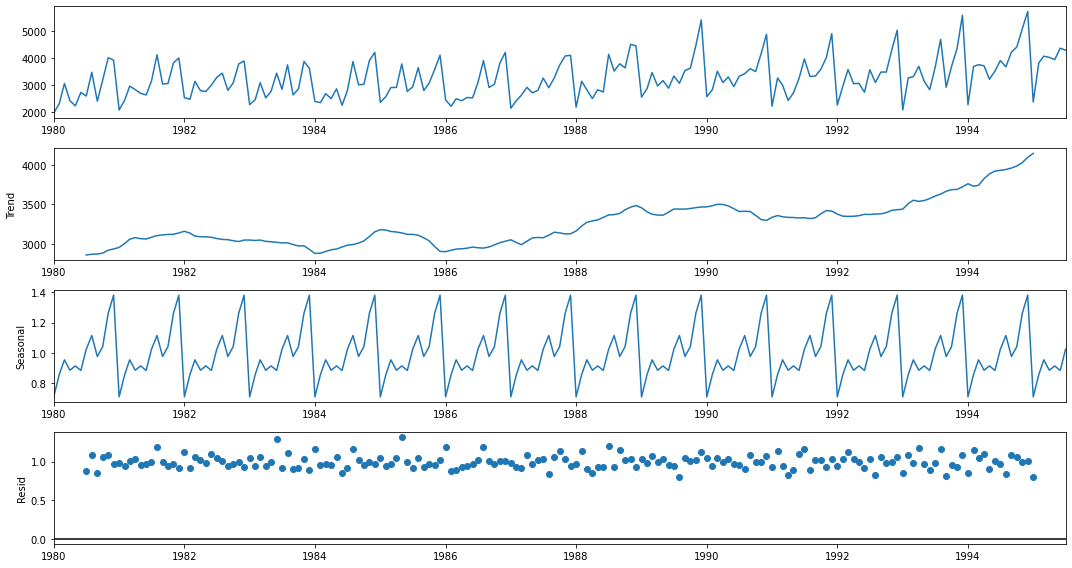

In [16]:
decompositionms = seasonal_decompose(df,model='multiplicative')
decompositionms.plot();
plt.savefig('decomposems.jpg', bbox_inches='tight');

In [17]:
trend = decompositionms.trend
seasonality = decompositionms.seasonal
residual = decompositionms.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('Soft_trend_m.csv')
seasonality.head(12).to_csv('Soft_season_m.csv')
residual.head(12).to_csv('Soft_resid_m.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2858.833333
1980-08-01    2869.250000
1980-09-01    2870.666667
1980-10-01    2883.833333
1980-11-01    2920.291667
1980-12-01    2935.500000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.709526
1980-02-01    0.856420
1980-03-01    0.953935
1980-04-01    0.885217
1980-05-01    0.913735
1980-06-01    0.883890
1980-07-01    1.023936
1980-08-01    1.114195
1980-09-01    0.975955
1980-10-01    1.040944
1980-11-01    1.261792
1980-12-01    1.380456
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.884444
1980-08-01    1.085425
1980-09-01    0.856641
1980-10-01    1.059326
1980-11-01    1.087983
1980-12-01    0.968332
Name: resi

## Split the data into train and test and plot the training and test data. [20%of the most recent data should be in test set]

In [18]:
train    =   df[df.index<'1991'] 
test     =   df[df.index>='1991']

In [19]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [20]:
from IPython.display import display

In [21]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


Last few rows of Training Data


,SoftDrinkProduction
YearMonth,
1990-08-01,3418
1990-09-01,3604
1990-10-01,3495
1990-11-01,4163
1990-12-01,4882


First few rows of Test Data


,SoftDrinkProduction
YearMonth,
1991-01-01,2211
1991-02-01,3260
1991-03-01,2992
1991-04-01,2425
1991-05-01,2707


Last few rows of Test Data


,SoftDrinkProduction
YearMonth,
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937
1995-06-01,4365
1995-07-01,4290


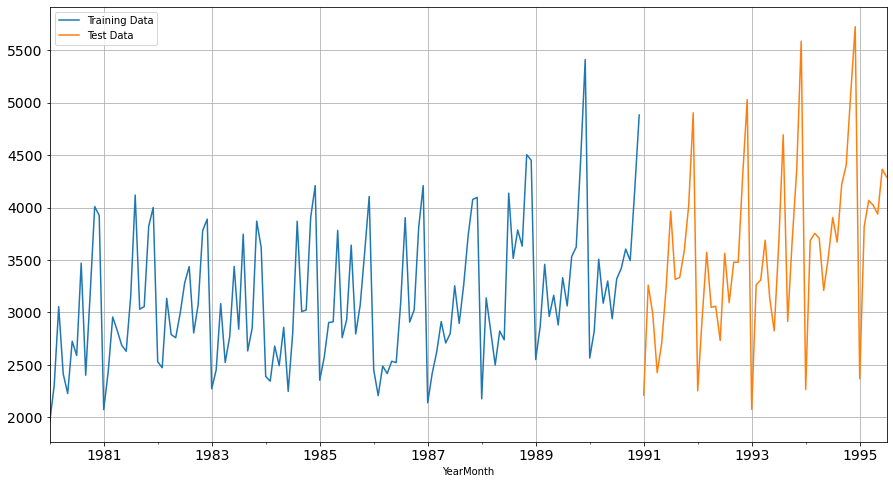

In [22]:
train['SoftDrinkProduction'].plot(fontsize=14)
test['SoftDrinkProduction'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Births' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [23]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [24]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [25]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,SoftDrinkProduction,time
YearMonth,,
1980-01-01,1954,1
1980-02-01,2302,2
1980-03-01,3054,3
1980-04-01,2414,4
1980-05-01,2226,5


Last few rows of Training Data


,SoftDrinkProduction,time
YearMonth,,
1990-08-01,3418,128
1990-09-01,3604,129
1990-10-01,3495,130
1990-11-01,4163,131
1990-12-01,4882,132


First few rows of Test Data


,SoftDrinkProduction,time
YearMonth,,
1991-01-01,2211,133
1991-02-01,3260,134
1991-03-01,2992,135
1991-04-01,2425,136
1991-05-01,2707,137


Last few rows of Test Data


,SoftDrinkProduction,time
YearMonth,,
1995-03-01,4067,183
1995-04-01,4022,184
1995-05-01,3937,185
1995-06-01,4365,186
1995-07-01,4290,187


Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'])

LinearRegression()

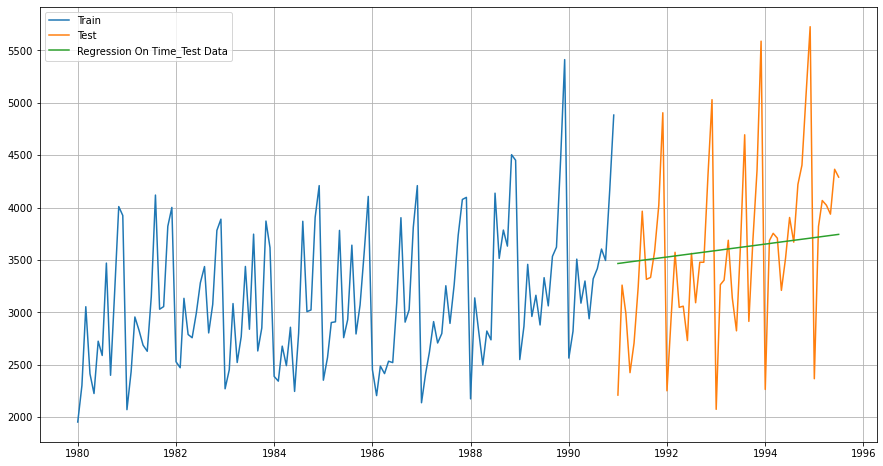

In [29]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [30]:
from sklearn import metrics

### Model Evaluation

In [31]:
rmse_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 775.808 


In [32]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,775.80781


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [33]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [34]:
train.tail()

,SoftDrinkProduction
YearMonth,
1990-08-01,3418
1990-09-01,3604
1990-10-01,3495
1990-11-01,4163
1990-12-01,4882


In [35]:
NaiveModel_test['naive'] = np.asarray(train['SoftDrinkProduction'])[len(np.asarray(train['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    4882
1991-02-01    4882
1991-03-01    4882
1991-04-01    4882
1991-05-01    4882
Name: naive, dtype: int64

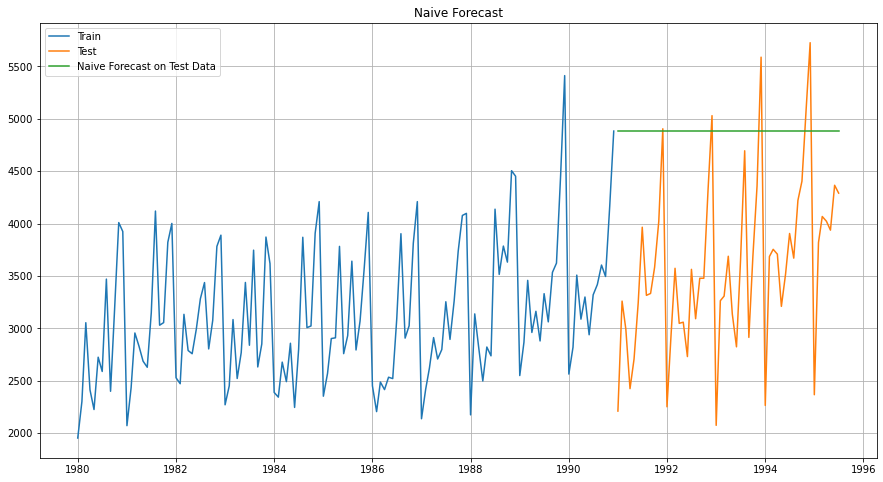

In [36]:
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [37]:
rmse_model2_test = metrics.mean_squared_error(test['SoftDrinkProduction'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1519.259


In [38]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233


## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [39]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [40]:
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

,SoftDrinkProduction,mean_forecast
YearMonth,,
1991-01-01,2211,3124.166667
1991-02-01,3260,3124.166667
1991-03-01,2992,3124.166667
1991-04-01,2425,3124.166667
1991-05-01,2707,3124.166667


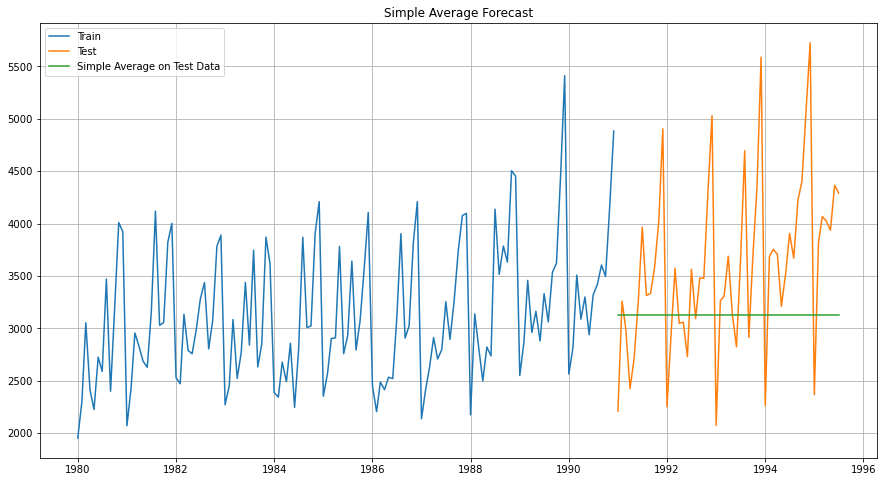

In [41]:
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [42]:
rmse_model3_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 934.353


In [43]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [44]:
MovingAverage = df.copy()
MovingAverage.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


#### Trailing moving averages

In [45]:

MovingAverage['Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()

MovingAverage.head()

,SoftDrinkProduction,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1954,NaN,NaN,NaN,NaN
1980-02-01,2302,2128.0,NaN,NaN,NaN
1980-03-01,3054,2678.0,NaN,NaN,NaN
1980-04-01,2414,2734.0,2431.0,NaN,NaN
1980-05-01,2226,2320.0,2499.0,NaN,NaN


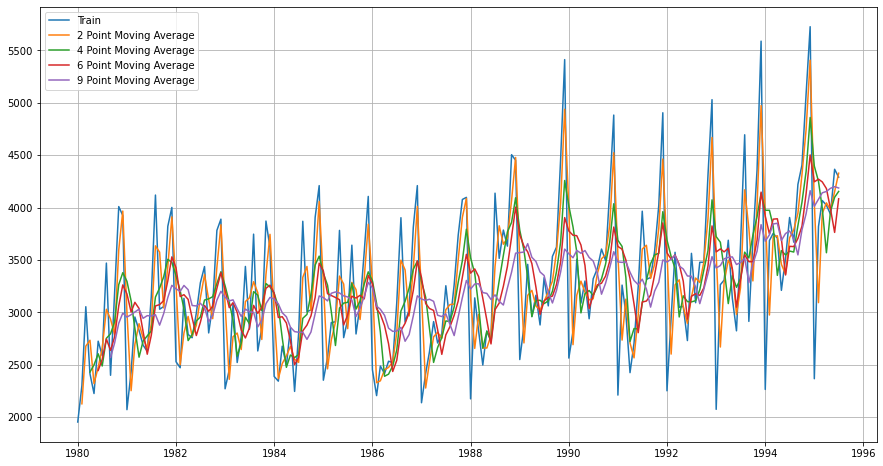

In [46]:
## Plotting on the whole data

plt.plot(MovingAverage['SoftDrinkProduction'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [47]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

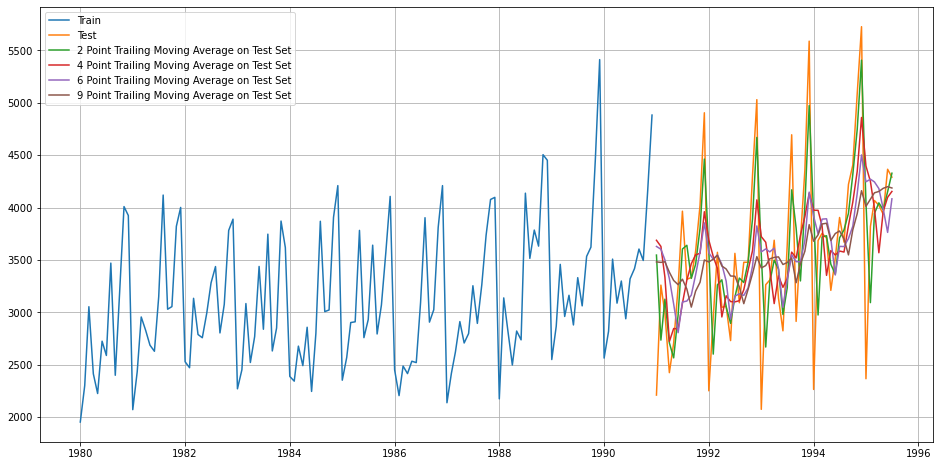

In [48]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(trailing_MovingAverage_test['SoftDrinkProduction'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [49]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 556.725
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 687.182
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 710.514
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 735.890


In [50]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358
2pointTrailingMovingAverage,556.725418
4pointTrailingMovingAverage,687.181726
6pointTrailingMovingAverage,710.513877
9pointTrailingMovingAverage,735.889827


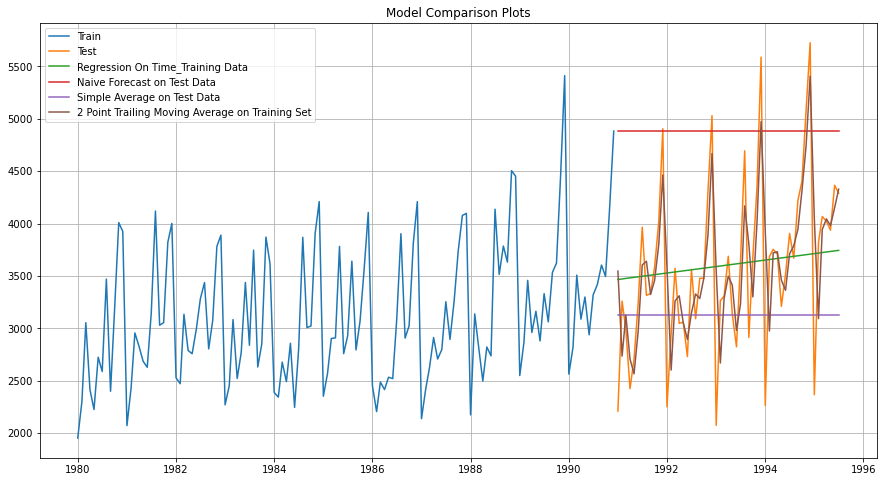

In [51]:
## Plotting on both Training and Test data

plt.plot(train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors
The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES).
This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

𝐹𝑡+1=𝛼𝑌𝑡+(1−𝛼)𝐹𝑡 
Parameter  𝛼  is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

In [52]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [53]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [54]:
model_SES_autofit = model_SES.fit(optimized=True)

In [55]:
model_SES_autofit.params

{'smoothing_level': 0.11907309094689855,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2573.0166666666655,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [56]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    3656.847753
1991-02-01    3656.847753
1991-03-01    3656.847753
1991-04-01    3656.847753
1991-05-01    3656.847753
1991-06-01    3656.847753
1991-07-01    3656.847753
1991-08-01    3656.847753
1991-09-01    3656.847753
1991-10-01    3656.847753
1991-11-01    3656.847753
1991-12-01    3656.847753
1992-01-01    3656.847753
1992-02-01    3656.847753
1992-03-01    3656.847753
1992-04-01    3656.847753
1992-05-01    3656.847753
1992-06-01    3656.847753
1992-07-01    3656.847753
1992-08-01    3656.847753
1992-09-01    3656.847753
1992-10-01    3656.847753
1992-11-01    3656.847753
1992-12-01    3656.847753
1993-01-01    3656.847753
1993-02-01    3656.847753
1993-03-01    3656.847753
1993-04-01    3656.847753
1993-05-01    3656.847753
1993-06-01    3656.847753
1993-07-01    3656.847753
1993-08-01    3656.847753
1993-09-01    3656.847753
1993-10-01    3656.847753
1993-11-01    3656.847753
1993-12-01    3656.847753
1994-01-01    3656.847753
1994-02-01    3656.847753
1994-03-01  

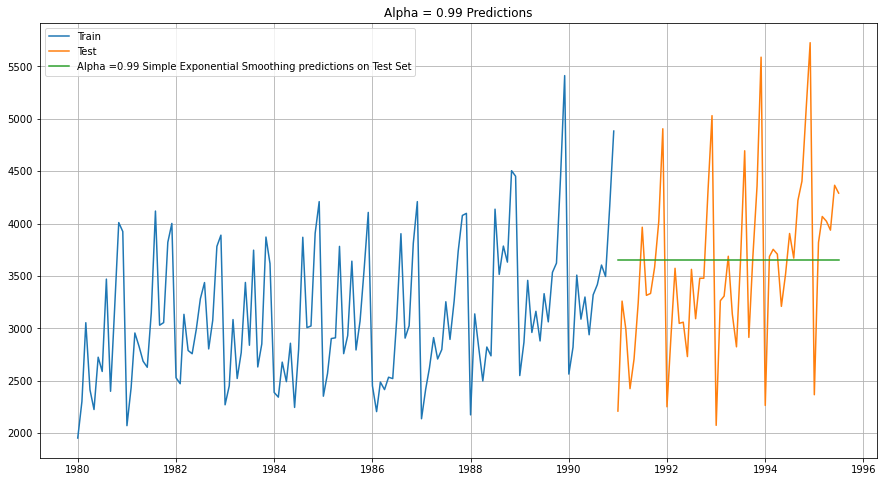

In [57]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [58]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [59]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 809.5016403931278
SES RMSE (calculated using statsmodels): 809.5016403931279


In [60]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",809.50164


# Holt - ETS(A, A, N) - Holt's linear method with additive errors
Double Exponential Smoothing
One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
Applicable when data has Trend but no seasonality.
Two separate components are considered: Level and Trend.
Level is the local mean.
One smoothing parameter α corresponds to the level series
A second smoothing parameter β corresponds to the trend series.

# Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.

Intercept or Level equation, 𝐿𝑡 is given by: 𝐿𝑡=𝛼𝑌𝑡+(1−𝛼)𝐹𝑡

Trend equation is given by 𝑇𝑡=𝛽(𝐿𝑡−𝐿𝑡−1)+(1−𝛽)𝑇𝑡−1

Here, 𝛼 and 𝛽 are the smoothing constants for level and trend, respectively,

0 <𝛼 < 1 and 0 < 𝛽 < 1.
The forecast at time t + 1 is given by

𝐹𝑡+1=𝐿𝑡+𝑇𝑡
𝐹𝑡+𝑛=𝐿𝑡+𝑛𝑇𝑡

In [61]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1242286864966588, 'smoothing_trend': 0.10769076164072929, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 2142.9200400852947, 'initial_trend': 42.27465415028941, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [62]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    3727.184397
1991-02-01    3751.450885
1991-03-01    3775.717372
1991-04-01    3799.983860
1991-05-01    3824.250348
1991-06-01    3848.516836
1991-07-01    3872.783323
1991-08-01    3897.049811
1991-09-01    3921.316299
1991-10-01    3945.582787
1991-11-01    3969.849274
1991-12-01    3994.115762
1992-01-01    4018.382250
1992-02-01    4042.648738
1992-03-01    4066.915225
1992-04-01    4091.181713
1992-05-01    4115.448201
1992-06-01    4139.714689
1992-07-01    4163.981176
1992-08-01    4188.247664
1992-09-01    4212.514152
1992-10-01    4236.780640
1992-11-01    4261.047127
1992-12-01    4285.313615
1993-01-01    4309.580103
1993-02-01    4333.846591
1993-03-01    4358.113078
1993-04-01    4382.379566
1993-05-01    4406.646054
1993-06-01    4430.912541
1993-07-01    4455.179029
1993-08-01    4479.445517
1993-09-01    4503.712005
1993-10-01    4527.978492
1993-11-01    4552.244980
1993-12-01    4576.511468
1994-01-01    4600.777956
1994-02-01    4625.044443
1994-03-01  

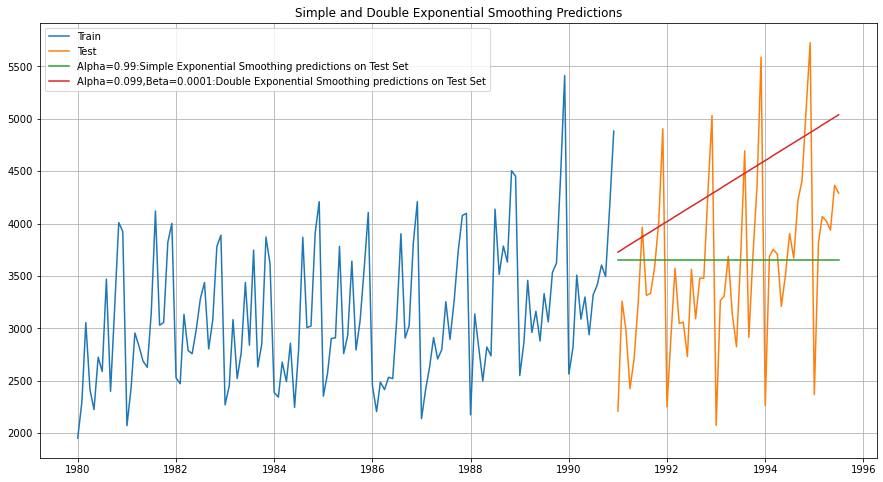

In [63]:

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [64]:
 print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 1074.3291531501832


In [65]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153


# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors¶

In [66]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.14628214287204402, 'smoothing_trend': 0.03985523474431963, 'smoothing_seasonal': 0.2624197351602548, 'damping_trend': nan, 'initial_level': 2803.214611111109, 'initial_trend': 7.179638888889087, 'initial_seasons': array([-687.29896528, -582.87175694,  -55.66104861, -365.74079861,
       -253.26738194, -196.41738194,  -32.54725694,  690.31611806,
       -282.20021528,   44.75545139,  867.40386806,  853.53236806]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [67]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    2573.415543
1991-02-01    2891.897210
1991-03-01    3287.593195
1991-04-01    2999.142548
1991-05-01    3206.039305
1991-06-01    3006.265950
1991-07-01    3541.746047
1991-08-01    3623.036399
1991-09-01    3615.247075
1991-10-01    3664.034781
1991-11-01    4383.017533
1991-12-01    4761.313125
1992-01-01    2626.715237
1992-02-01    2945.196904
1992-03-01    3340.892889
1992-04-01    3052.442242
1992-05-01    3259.338999
1992-06-01    3059.565644
1992-07-01    3595.045740
1992-08-01    3676.336093
1992-09-01    3668.546769
1992-10-01    3717.334475
1992-11-01    4436.317227
1992-12-01    4814.612818
1993-01-01    2680.014931
1993-02-01    2998.496597
1993-03-01    3394.192583
1993-04-01    3105.741935
1993-05-01    3312.638693
1993-06-01    3112.865338
1993-07-01    3648.345434
1993-08-01    3729.635787
1993-09-01    3721.846463
1993-10-01    3770.634169
1993-11-01    4489.616921
1993-12-01    4867.912512
1994-01-01    2733.314625
1994-02-01    3051.796291
1994-03-01  

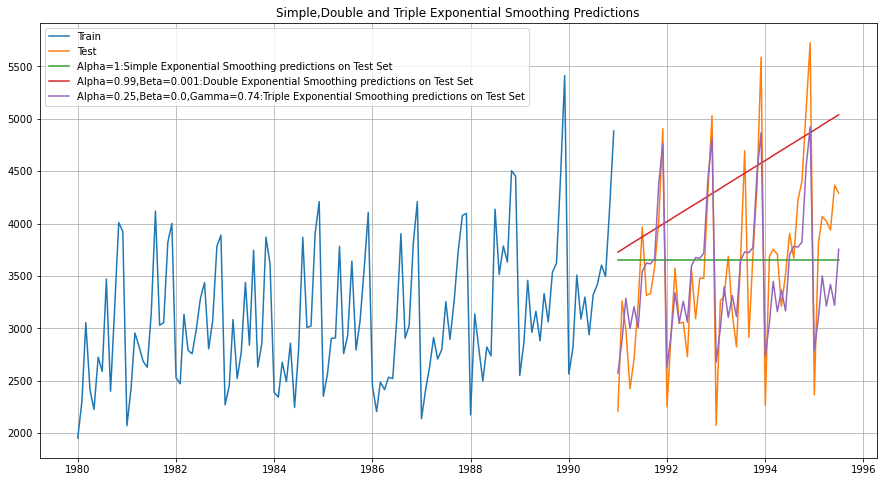

In [68]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [69]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 458.9653920540907


In [70]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",458.965392


Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [71]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11128429736328378, 'smoothing_trend': 0.04947326762762311, 'smoothing_seasonal': 0.23037194388521623, 'damping_trend': nan, 'initial_level': 2803.0168193984414, 'initial_trend': 10.486286228443715, 'initial_seasons': array([0.80284001, 0.86968748, 1.08266033, 0.93954787, 0.96331944,
       0.98854326, 1.0654188 , 1.28504436, 1.0083707 , 1.0929922 ,
       1.36460606, 1.41709466]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [72]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    2564.869242
1991-02-01    2887.850537
1991-03-01    3300.056912
1991-04-01    3007.348662
1991-05-01    3213.743610
1991-06-01    3020.085798
1991-07-01    3573.891809
1991-08-01    3716.166910
1991-09-01    3598.070539
1991-10-01    3680.517441
1991-11-01    4458.769326
1991-12-01    4868.950881
1992-01-01    2605.675007
1992-02-01    2933.733938
1992-03-01    3352.420293
1992-04-01    3055.004505
1992-05-01    3264.602921
1992-06-01    3067.817416
1992-07-01    3630.301883
1992-08-01    3774.745594
1992-09-01    3654.713240
1992-10-01    3738.382153
1992-11-01    4528.777911
1992-12-01    4945.299961
1993-01-01    2646.480772
1993-02-01    2979.617340
1993-03-01    3404.783674
1993-04-01    3102.660348
1993-05-01    3315.462232
1993-06-01    3115.549035
1993-07-01    3686.711956
1993-08-01    3833.324277
1993-09-01    3711.355941
1993-10-01    3796.246865
1993-11-01    4598.786495
1993-12-01    5021.649041
1994-01-01    2687.286537
1994-02-01    3025.500741
1994-03-01  

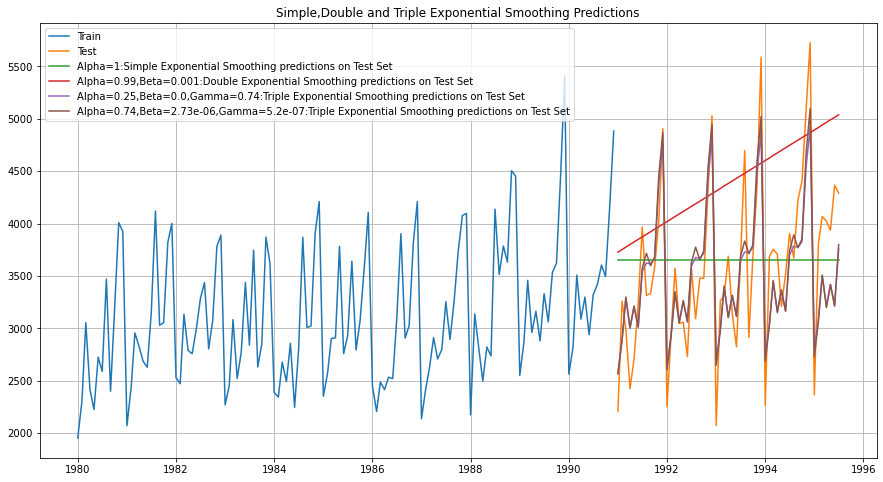

In [73]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [74]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 447.7225807439294


In [75]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11107144899998123, 'smoothing_trend': 0.03702381401809802, 'smoothing_seasonal': 0.23046297450909184, 'damping_trend': 0.9900000003126675, 'initial_level': 2803.211102873598, 'initial_trend': 25.537513938294357, 'initial_seasons': array([0.77275445, 0.83359423, 1.00890695, 0.90381876, 0.92260566,
       0.94453645, 1.00960548, 1.23531148, 0.96140543, 1.04091731,
       1.29390614, 1.32708873]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [76]:
TES_predict_am_damp_spark =  model_TES_am.forecast(len(test))
TES_predict_am_damp_spark

1991-01-01    2554.864649
1991-02-01    2876.126023
1991-03-01    3282.291319
1991-04-01    2993.753871
1991-05-01    3198.062594
1991-06-01    3004.519520
1991-07-01    3552.545695
1991-08-01    3694.689366
1991-09-01    3576.168709
1991-10-01    3656.048315
1991-11-01    4426.301280
1991-12-01    4821.997457
1992-01-01    2584.242178
1992-02-01    2908.833811
1992-03-01    3319.207868
1992-04-01    3027.055505
1992-05-01    3233.246707
1992-06-01    3037.212125
1992-07-01    3590.778278
1992-08-01    3734.016827
1992-09-01    3613.818666
1992-10-01    3694.119058
1992-11-01    4471.890036
1992-12-01    4871.120517
1993-01-01    2610.281976
1993-02-01    2937.825498
1993-03-01    3351.930138
1993-04-01    3056.573569
1993-05-01    3264.433372
1993-06-01    3066.190356
1993-07-01    3624.667061
1993-08-01    3768.876093
1993-09-01    3647.191018
1993-10-01    3727.864388
1993-11-01    4512.299219
1993-12-01    4914.662455
1994-01-01    2633.363259
1994-02-01    2963.523292
1994-03-01  

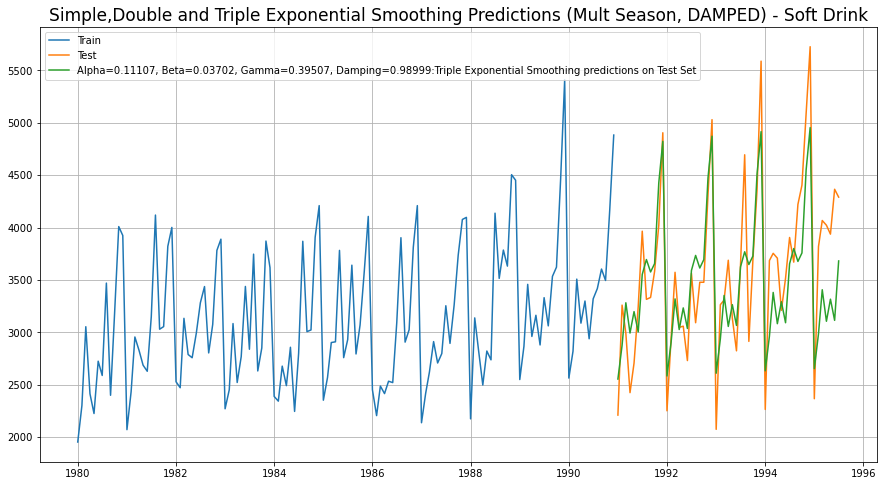

In [77]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')



plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, DAMPED) - Soft Drink', fontsize=17);

plt.savefig('spark_mul_damp_tes.jpg', bbox_inches='tight');

In [78]:
print('TES_am DAMPED RMSE_spark:',mean_squared_error(test.values,TES_predict_am_damp_spark.values,squared=False))

TES_am DAMPED RMSE_spark: 477.0077894619355


# Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [79]:
from statsmodels.tsa.stattools import adfuller

In [80]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -0.425
DF test p-value is 0.9861019765758294
Number of lags used 12


In [81]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -9.481
DF test p-value is 3.0537092925364445e-14
Number of lags used 11


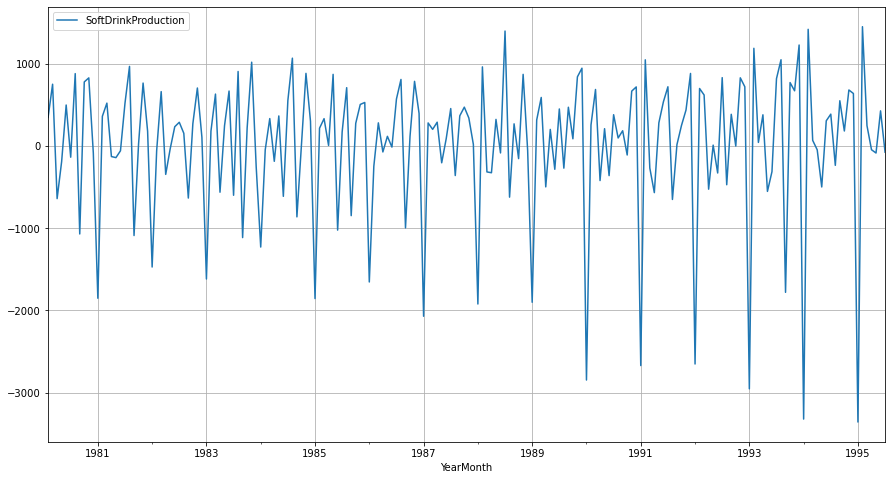

In [82]:
df.diff().dropna().plot(grid=True);

# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [83]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

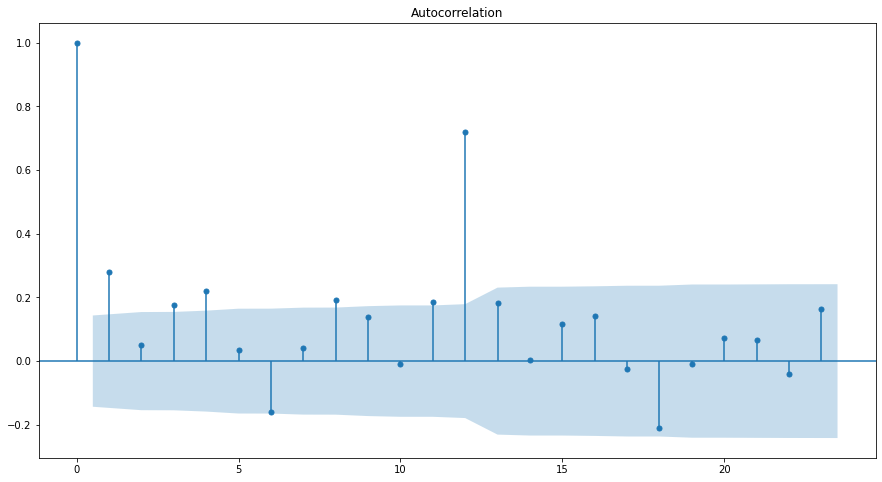

In [84]:
plot_acf(df,alpha=0.05);

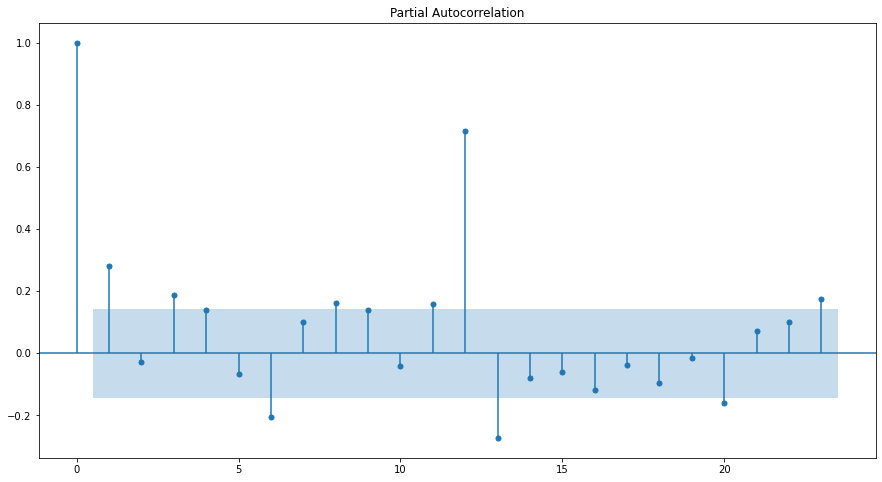

In [85]:
plot_pacf(df,alpha=0.05);

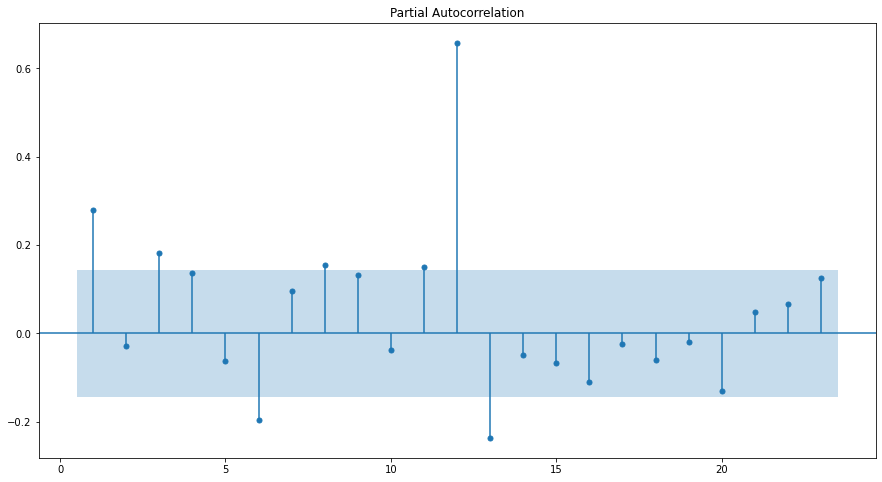

In [86]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

In [87]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.649
DF test p-value is 0.7726647141271836
Number of lags used 12


In [88]:
dftest = adfuller(train.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.271
DF test p-value is 3.4205181049973744e-09
Number of lags used 11


Now we can reject Null Hypothesis, d=1

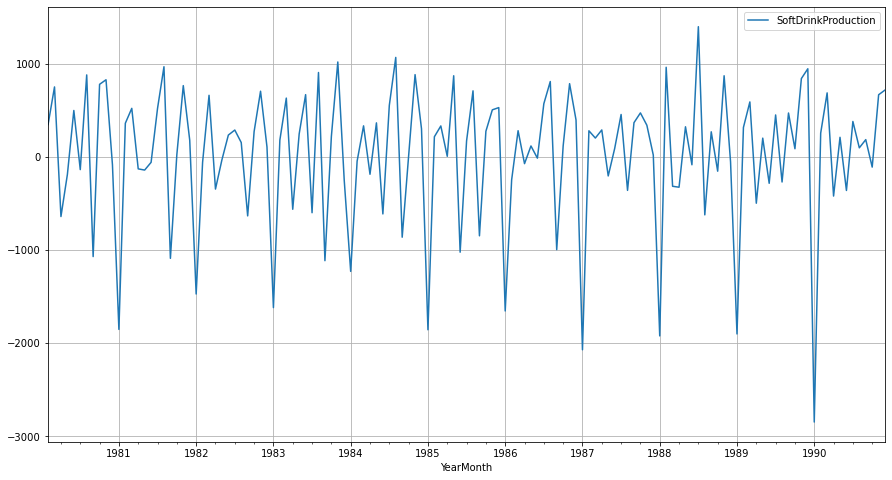

In [89]:
train.diff().dropna().plot(grid=True);

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


# Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [91]:
import itertools
p = q = range(0,4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [92]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [93]:
from statsmodels.tsa.arima.model import ARIMA

In [94]:
for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['SoftDrinkProduction'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.5996302114518
ARIMA(0, 1, 2) - AIC:2056.489263243503
ARIMA(0, 1, 3) - AIC:2056.8317894190786
ARIMA(1, 1, 0) - AIC:2097.8721216490417
ARIMA(1, 1, 1) - AIC:2061.523083931589
ARIMA(1, 1, 2) - AIC:2056.715682068915
ARIMA(1, 1, 3) - AIC:2058.712159036266
ARIMA(2, 1, 0) - AIC:2073.234860536023
ARIMA(2, 1, 1) - AIC:2059.100671813713
ARIMA(2, 1, 2) - AIC:2058.712702099663


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2057.089634696414
ARIMA(3, 1, 0) - AIC:2070.3653671411857
ARIMA(3, 1, 1) - AIC:2058.304545910386
ARIMA(3, 1, 2) - AIC:2060.6799657020233
ARIMA(3, 1, 3) - AIC:2059.6070715115798


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [95]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
2,"(0, 1, 2)",2056.489263
6,"(1, 1, 2)",2056.715682
3,"(0, 1, 3)",2056.831789
11,"(2, 1, 3)",2057.089635
13,"(3, 1, 1)",2058.304546


In [96]:
auto_ARIMA = ARIMA(train, order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(0, 1, 2)   Log Likelihood               -1025.245
Date:                 Mon, 20 Jun 2022   AIC                           2056.489
Time:                         20:58:26   BIC                           2065.115
Sample:                     01-01-1980   HQIC                          2059.994
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5407      0.085     -6.392      0.000      -0.707      -0.375
ma.L2         -0.3913      0.113     -3.475      0.001      -0.612      -0.171
sigma2      3.572e+05   4.62e+04      7.725 

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


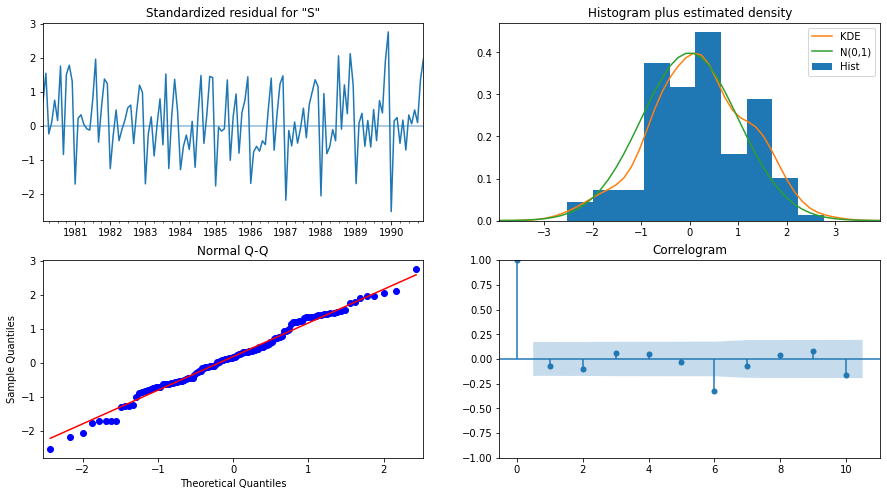

In [97]:
results_auto_ARIMA.plot_diagnostics();

# Predict on the Test Set using this model and evaluate the model.

In [98]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [99]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [100]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 831.6158481743172 
MAPE: 18.494207971675657


In [101]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(0,1,2)",831.615848,18.494208


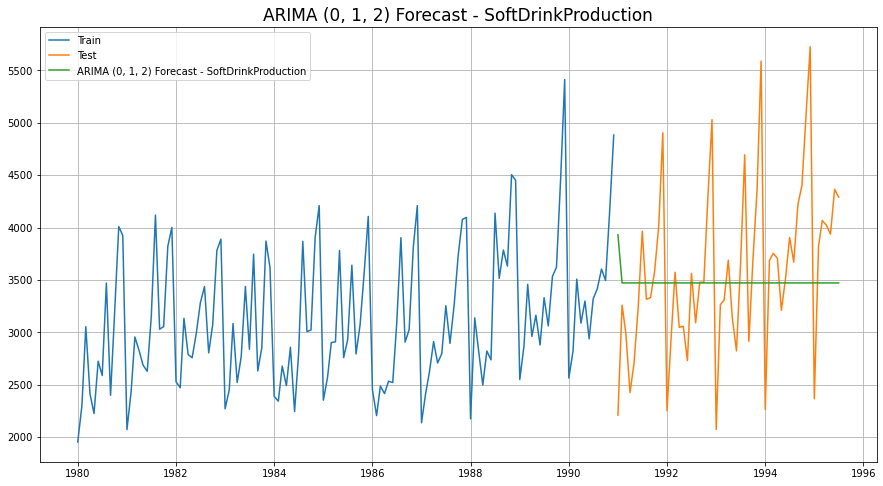

In [102]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_auto_ARIMA, label = 'ARIMA (0, 1, 2) Forecast - SoftDrinkProduction')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (0, 1, 2) Forecast - SoftDrinkProduction', fontsize=17)
plt.savefig('SoftDrink_arima_manual_forecast.jpg', bbox_inches='tight');

# Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

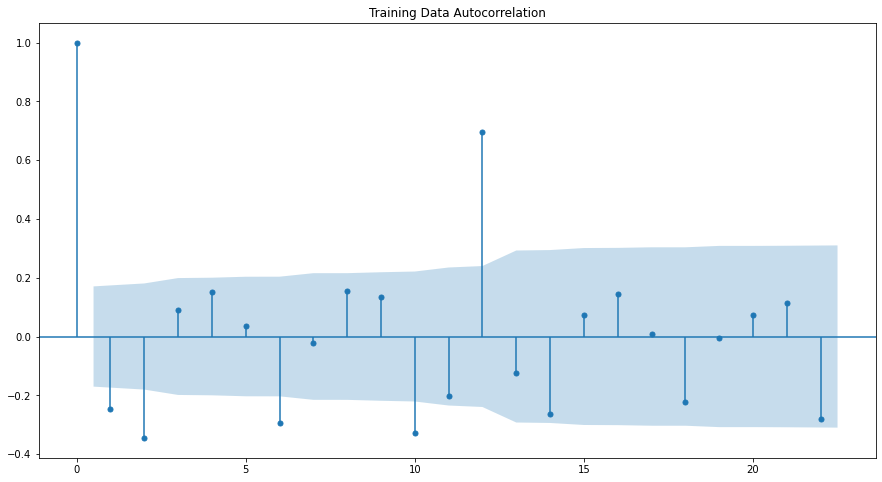

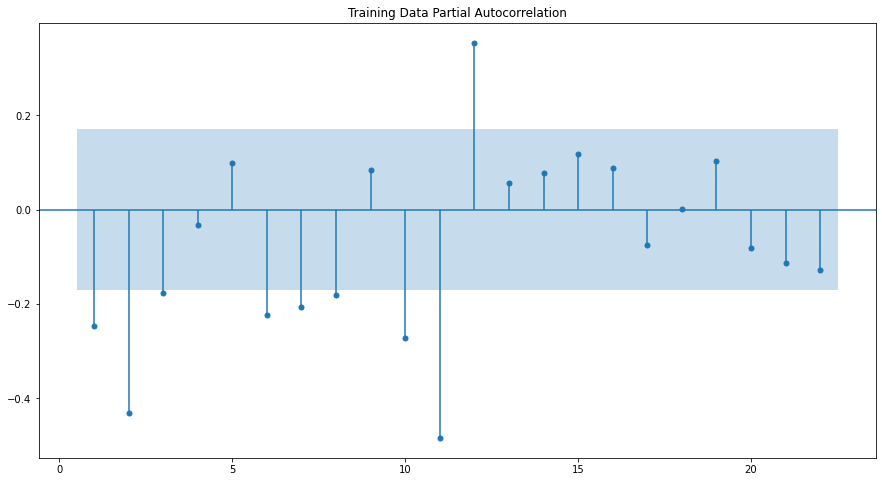

In [103]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [104]:
manual_ARIMA = ARIMA(train['SoftDrinkProduction'], order=(3,1,3))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(3, 1, 3)   Log Likelihood               -1022.804
Date:                 Mon, 20 Jun 2022   AIC                           2059.607
Time:                         20:58:28   BIC                           2079.733
Sample:                     01-01-1980   HQIC                          2067.785
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6832      0.344      1.987      0.047       0.009       1.357
ar.L2          0.2748      0.484      0.568      0.570      -0.673       1.223
ar.L3         -0.0695      0.199     -0.349 

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


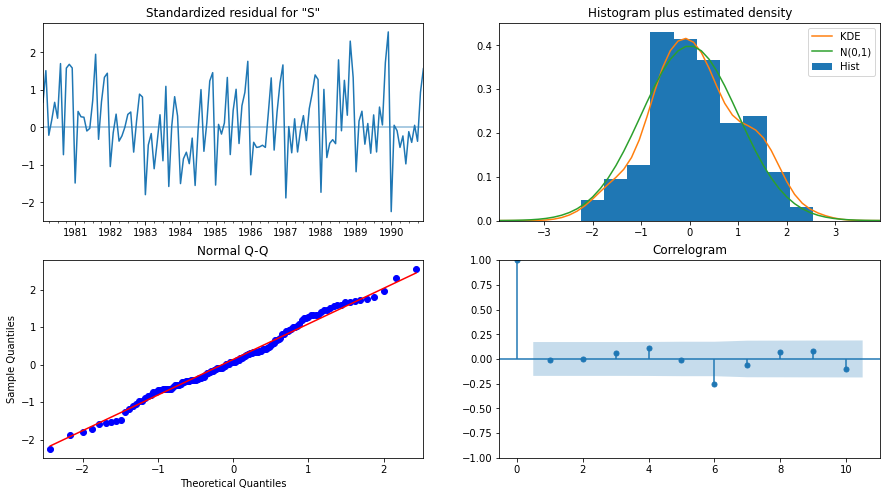

In [105]:
results_manual_ARIMA.plot_diagnostics();

In [106]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [107]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [108]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 816.737764427834 
MAPE: 19.934187325078824


In [109]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])

resultsDf

,RMSE,MAPE
"ARIMA(3,1,3)",816.737764,19.934187


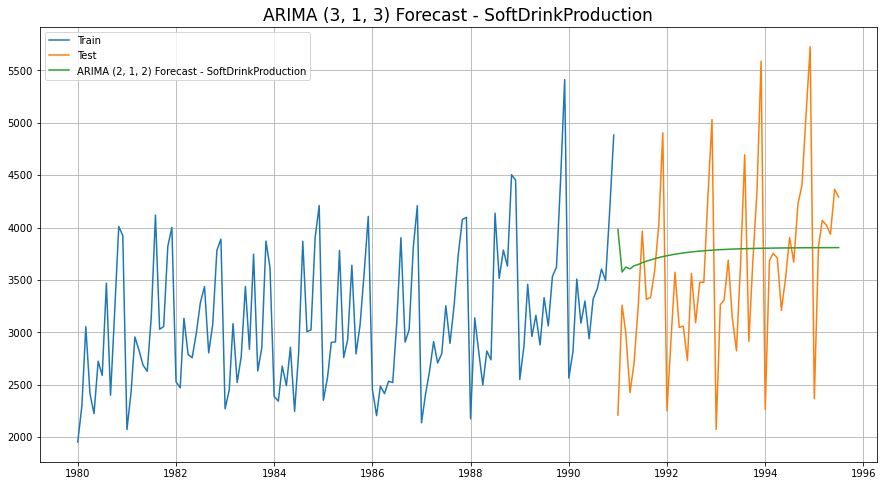

In [110]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - SoftDrinkProduction')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (3, 1, 3) Forecast - SoftDrinkProduction', fontsize=17)
plt.savefig('SoftDrink_arima_manual_forecast.jpg', bbox_inches='tight');

# SARIMA - Automated

# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

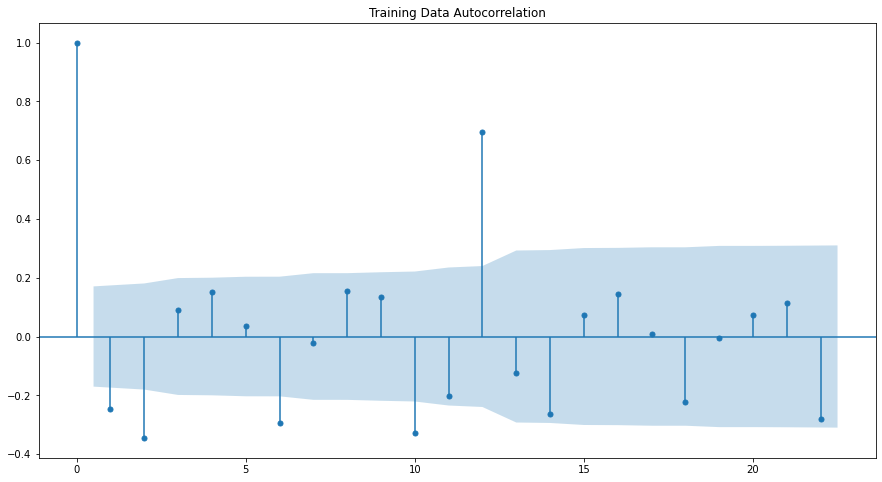

In [111]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [112]:
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [113]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [114]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1836.2200937706295
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1633.54917936538
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1789.866280699666
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1764.610723889966
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1591.515574448135
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1608.648860364038
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1608.6165283980397
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1591.8014039553789
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2035.4871783907797
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1788.5369694843914
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1577.0183750555839
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1749.9824755850375
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1697.7997311035595
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1530.6914315581446
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1563.4637994171042
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1558.2120753823863
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1529.2536659255513
SARIMA(0, 1, 2)x

In [115]:
SARIMA_AIC.sort_values(by=['AIC']).head(30)

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",1517.207903
23,"(0, 1, 2)","(1, 0, 2, 12)",1518.229381
53,"(1, 1, 2)","(2, 0, 2, 12)",1518.328977
50,"(1, 1, 2)","(1, 0, 2, 12)",1519.197012
80,"(2, 1, 2)","(2, 0, 2, 12)",1520.313656
77,"(2, 1, 2)","(1, 0, 2, 12)",1521.191005
17,"(0, 1, 1)","(2, 0, 2, 12)",1529.253666
44,"(1, 1, 1)","(2, 0, 2, 12)",1530.656752
14,"(0, 1, 1)","(1, 0, 2, 12)",1530.691432
41,"(1, 1, 1)","(1, 0, 2, 12)",1531.868334


In [116]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -751.604
Date:                            Mon, 20 Jun 2022   AIC                           1517.208
Time:                                    20:58:57   BIC                           1535.719
Sample:                                01-01-1980   HQIC                          1524.707
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9981      0.141     -7.092      0.000      -1.274      -0.722
ma.L2         -0.1064      0.121   

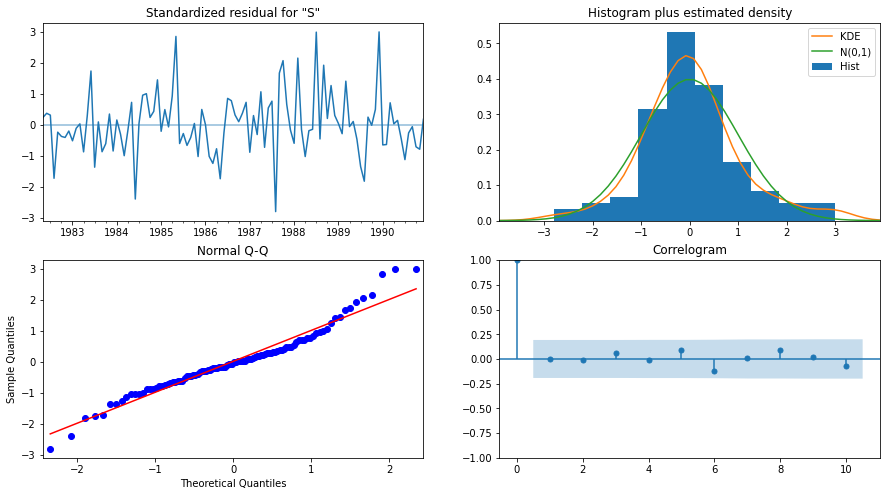

In [117]:
results_auto_SARIMA.plot_diagnostics();

# Predict on the Test Set using this model and evaluate the model.

In [118]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [119]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

SoftDrinkProduction,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,2657.024990,328.613862,2012.953656,3301.096323
1991-02-01,2979.306655,334.136597,2324.410959,3634.202352
1991-03-01,3404.286350,335.603094,2746.516374,4062.056327
1991-04-01,3086.458773,337.063865,2425.825738,3747.091808
1991-05-01,3284.532844,338.518359,2621.049051,3948.016636


In [120]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 437.7065285455233 
MAPE: 11.049873410607988


In [121]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(3,1,3)",816.737764,19.934187
"SARIMA(0,1,2)(2,0,2,12)",437.706529,11.049873


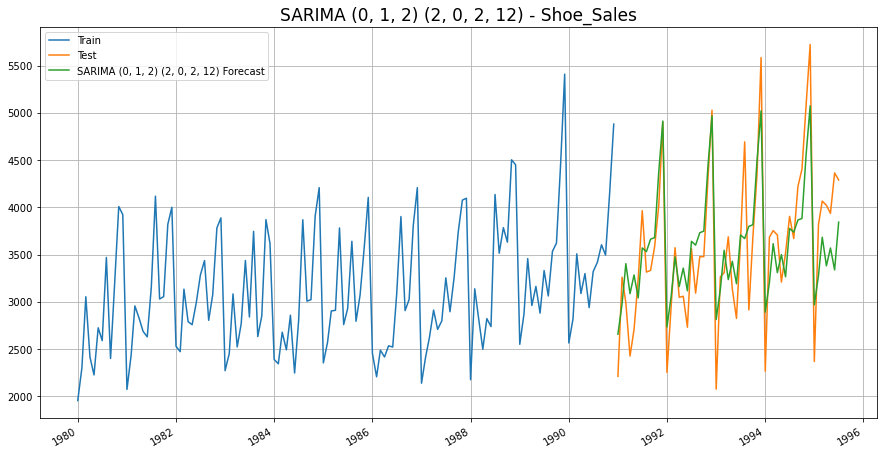

In [122]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (0, 1, 2) (2, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (0, 1, 2) (2, 0, 2, 12) - Shoe_Sales', fontsize=17);

plt.savefig('SoftDrink_sarima_auto_30012.jpg', bbox_inches='tight');

# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

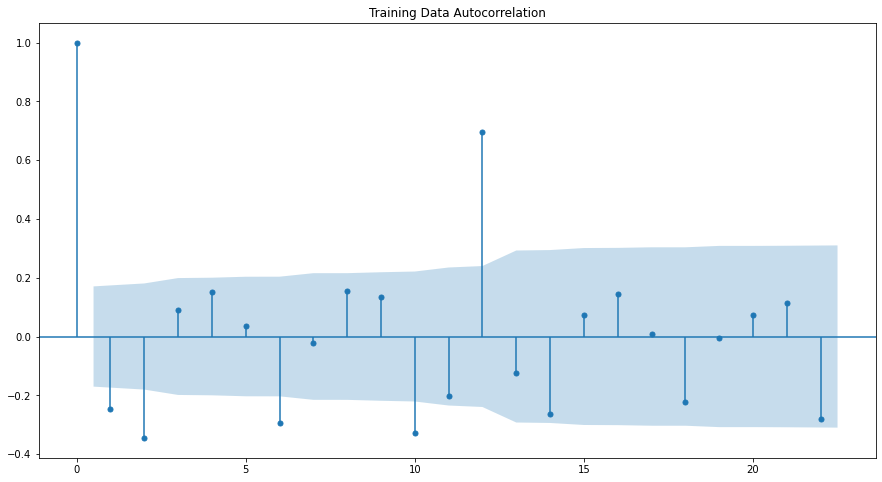

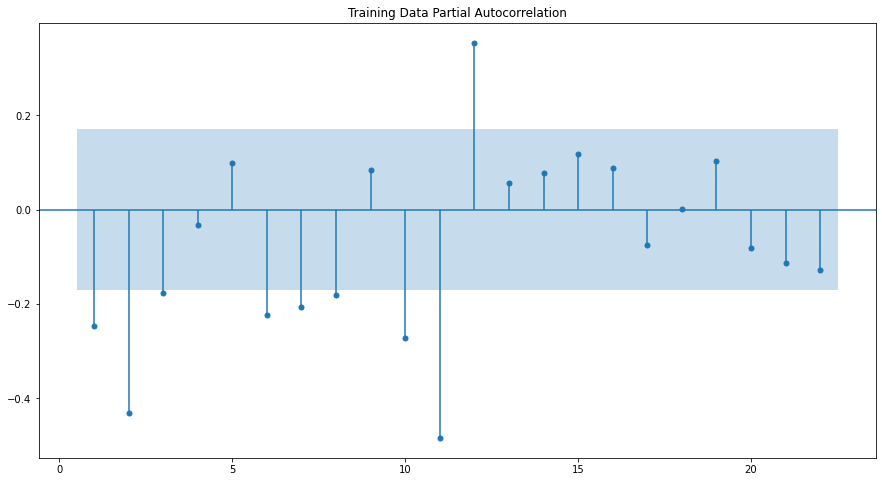

In [123]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [124]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(3,1,3),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                     SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 12)   Log Likelihood                -658.102
Date:                                 Mon, 20 Jun 2022   AIC                           1338.204
Time:                                         20:59:05   BIC                           1365.823
Sample:                                     01-01-1980   HQIC                          1349.346
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7450      0.146    -11.929      0.000      -2.032      -1

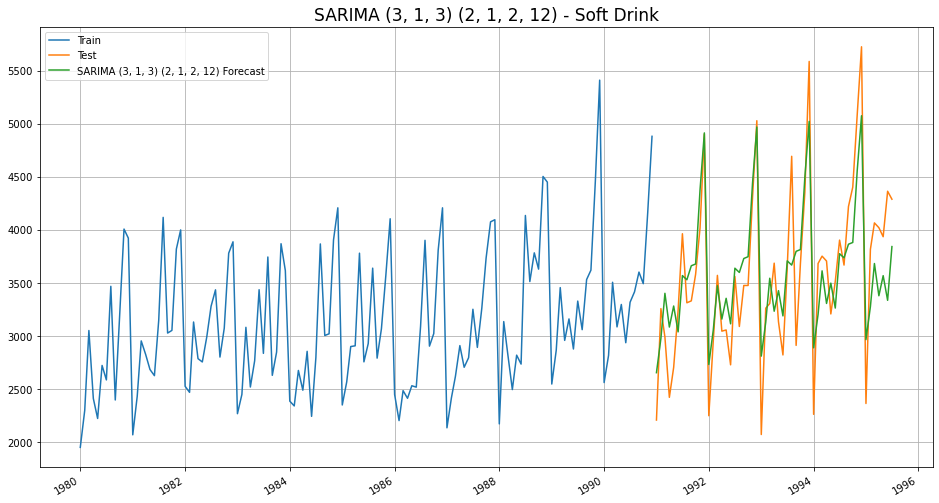

In [139]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 3) (2, 1, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 3) (2, 1, 2, 12) - Soft Drink', fontsize=17);

plt.savefig('SoftDrink_sarima_auto_30012.jpg', bbox_inches='tight');

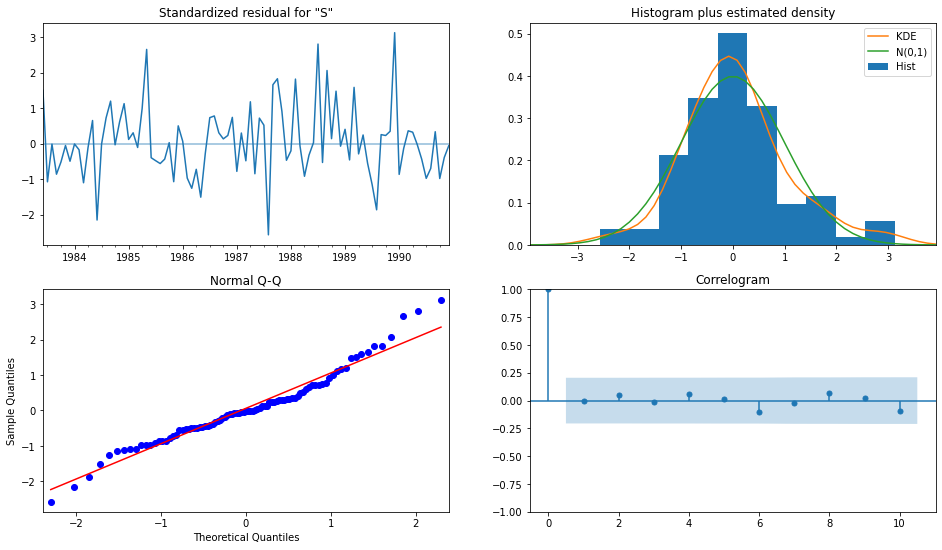

In [140]:
results_manual_SARIMA.plot_diagnostics();

In [125]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [126]:
rmse4 = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape4 = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse4,'\nMAPE:',mape)

RMSE: 431.81130975531306 
MAPE: 11.049873410607988


In [127]:
full_data_model = sm.tsa.statespace.SARIMAX(df['SoftDrinkProduction'],
                                order=(3,1,3),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                     SoftDrinkProduction   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 12)   Log Likelihood               -1063.305
Date:                                 Mon, 20 Jun 2022   AIC                           2148.610
Time:                                         20:59:13   BIC                           2181.430
Sample:                                     01-01-1980   HQIC                          2161.946
                                          - 07-01-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8906      0.100    -18.929      0.000      -2.086      -1

# Predict on the Test Set using this model and evaluate the model.

# Evaluate the model on the whole data and predict 20 months into the future (till the end of next year).

In [128]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [129]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(12)

SoftDrinkProduction,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,4401.400102,348.188854,3718.962489,5083.837716
1995-09-01,4205.342496,352.031302,3515.373823,4895.311168
1995-10-01,4525.251271,353.839252,3831.739081,5218.763461
1995-11-01,5114.877910,359.430346,4410.407377,5819.348444
1995-12-01,6111.711129,363.300665,5399.654909,6823.767349
1996-01-01,2843.674220,366.027060,2126.274365,3561.074074
1996-02-01,4257.898977,372.458336,3527.894051,4987.903902
1996-03-01,4236.186666,373.871175,3503.412628,4968.960703
1996-04-01,4353.116847,381.541209,3605.309820,5100.923874
1996-05-01,3975.191336,382.736963,3225.040674,4725.341998


In [130]:
rmse = mean_squared_error(df['SoftDrinkProduction'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 579.1007714911281


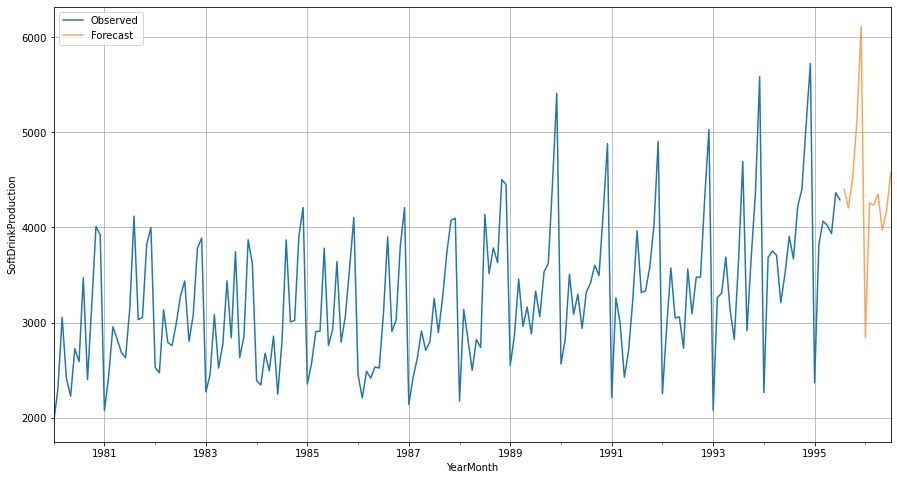

In [131]:
axis = df['SoftDrinkProduction'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('SoftDrinkProduction')
plt.legend(loc='best')
plt.grid();

In [132]:
resultsS0 = resultsDf.copy()

resultsS0.to_csv('SoftDrink_all_arima.csv')

In [133]:
results_all_spark = pd.concat([resultsDf], axis=0)
results_all_spark

,RMSE,MAPE
"ARIMA(3,1,3)",816.737764,19.934187
"SARIMA(0,1,2)(2,0,2,12)",437.706529,11.049873


# ForeCasting for Next 12 Months.

In [134]:
model_TES_am = ExponentialSmoothing(test,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11107145564145629, 'smoothing_trend': 0.11107145200292193, 'smoothing_seasonal': 0.00010002911019079774, 'damping_trend': 0.9899999939486129, 'initial_level': 3348.594331454551, 'initial_trend': 2.6894373947855392, 'initial_seasons': array([0.62720839, 0.96991526, 1.00501995, 0.97480693, 0.9015497 ,
       0.94953354, 1.08617169, 1.06777202, 1.00235974, 1.08964158,
       1.28297587, 1.52685494]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [135]:
TES_predict_am_damp_spark =  model_TES_am.forecast(steps=12)
TES_predict_am_damp_spark
prediction_1 = TES_predict_am_damp_spark
TES_predict_am_damp_spark.to_csv('SoftDrink_forecast_tes.csv')

In [136]:
plt.rcParams["figure.figsize"] = [16,9]

In [137]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,3875.674338,4473.621463,5071.568589
1995-09-01,3636.667893,4234.615018,4832.562144
1995-10-01,4043.111299,4641.058425,5239.005551
1995-11-01,4910.524929,5508.472055,6106.419180
1995-12-01,6009.434934,6607.382059,7205.329185


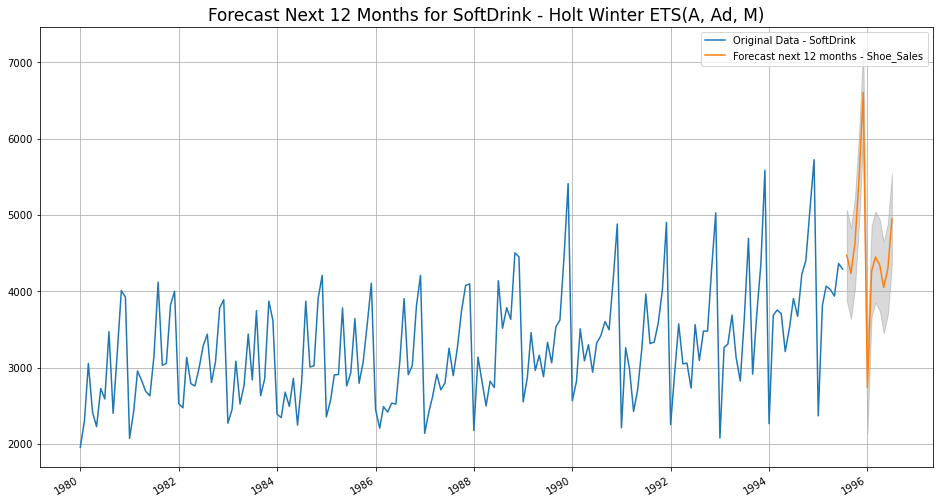

In [138]:
plt.plot(df['SoftDrinkProduction'], label='Original Data - SoftDrink')

ax =TES_predict_am_damp_spark.plot(label='Forecast next 12 months - Shoe_Sales')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for SoftDrink - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('SoftDrink_forecast_tes.jpg', bbox_inches='tight');